In [6]:
from google.colab import files
uploaded = files.upload()

Saving Dataset(merge)(LQdw).xlsx to Dataset(merge)(LQdw) (1).xlsx


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


# PRÉ-PROCESSAMENTO



Limpeza

In [7]:
df = pd.read_excel("Dataset(merge)(LQdw).xlsx")

In [8]:
df.head()

,Matrícula,Data de Nascimento,Semestre,Curso,Disciplinas,Av1,Av2,FALTA,Tipo de Ingresso,BOLSA,%_BOLSA,Status
0,-,-,-,Arquitetura e Urbanismo,-,-,-,-,-,-,-,1
1,-,-,-,Arquitetura e Urbanismo,IDP INTERSHIP,-,-,-,-,-,-,1
2,-,-,-,Arquitetura e Urbanismo,TEORIA E HISTÓRIA II,-,-,-,-,-,-,1
3,-,-,-,Arquitetura e Urbanismo,TOPOGRAFIA,-,-,-,-,-,-,1
4,12,2002-09-13 00:00:00.000,1/2021,Jornalismo,DATA SCIENCE PARA NEGÓCIOS I: APRENDENDO A PRO...,10.0000,8.0000,0.0000,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0000,1


# status 0 = cursando
# status 1 - evadido

In [9]:
df.replace("-", np.nan, inplace=True)
df = df.dropna()

In [10]:
df.head()

,Matrícula,Data de Nascimento,Semestre,Curso,Disciplinas,Av1,Av2,FALTA,Tipo de Ingresso,BOLSA,%_BOLSA,Status
4,12.0,2002-09-13 00:00:00.000,1/2021,Jornalismo,DATA SCIENCE PARA NEGÓCIOS I: APRENDENDO A PRO...,10.0000,8.0000,0.0000,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0000,1
5,12.0,2002-09-13 00:00:00.000,1/2021,Jornalismo,HISTÓRIA E FORMAÇÃO SOCIAL BRASILEIRA,10.0000,10.0000,0.0000,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0000,1
6,12.0,2002-09-13 00:00:00.000,1/2021,Jornalismo,INTRODUÇÃO À FOTOGRAFIA,7.2000,6.5000,0.0000,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0000,1
7,12.0,2002-09-13 00:00:00.000,1/2021,Jornalismo,"LINGUAGEM, NARRATIVA E ESCRITA CRIATIVA",10.0000,8.5000,0.0000,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0000,1
8,12.0,2002-09-13 00:00:00.000,1/2021,Jornalismo,PROFISSÃO JORNALISTA,9.0000,9.0000,0.0000,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0000,1


In [11]:
df['Data de Nascimento'] = pd.to_datetime(df['Data de Nascimento'], format='%Y-%m-%d')

# Calculando a idade com base na data de nascimento e na data atual
hoje = datetime.now()
df['Idade'] = (hoje - df['Data de Nascimento']).astype('<m8[Y]')

# Agora, você pode remover a coluna 'Data de Nascimento' se desejar
df = df.drop('Data de Nascimento', axis=1)

In [12]:

df['Av1'] = pd.to_numeric(df['Av1'], errors='coerce')
df['Av2'] = pd.to_numeric(df['Av2'], errors='coerce')
df['FALTA'] = pd.to_numeric(df['FALTA'], errors='coerce')
df['%_BOLSA'] = pd.to_numeric(df['%_BOLSA'], errors='coerce')

In [13]:
df.head()

,Matrícula,Semestre,Curso,Disciplinas,Av1,Av2,FALTA,Tipo de Ingresso,BOLSA,%_BOLSA,Status,Idade
4,12.0,1/2021,Jornalismo,DATA SCIENCE PARA NEGÓCIOS I: APRENDENDO A PRO...,10.0,8.0,0.0,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0,1,21.0
5,12.0,1/2021,Jornalismo,HISTÓRIA E FORMAÇÃO SOCIAL BRASILEIRA,10.0,10.0,0.0,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0,1,21.0
6,12.0,1/2021,Jornalismo,INTRODUÇÃO À FOTOGRAFIA,7.2,6.5,0.0,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0,1,21.0
7,12.0,1/2021,Jornalismo,"LINGUAGEM, NARRATIVA E ESCRITA CRIATIVA",10.0,8.5,0.0,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0,1,21.0
8,12.0,1/2021,Jornalismo,PROFISSÃO JORNALISTA,9.0,9.0,0.0,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0,1,21.0


In [14]:
df_limpo = df

<ipython-input-16-5fcb1d0884d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df_limpo.corr()


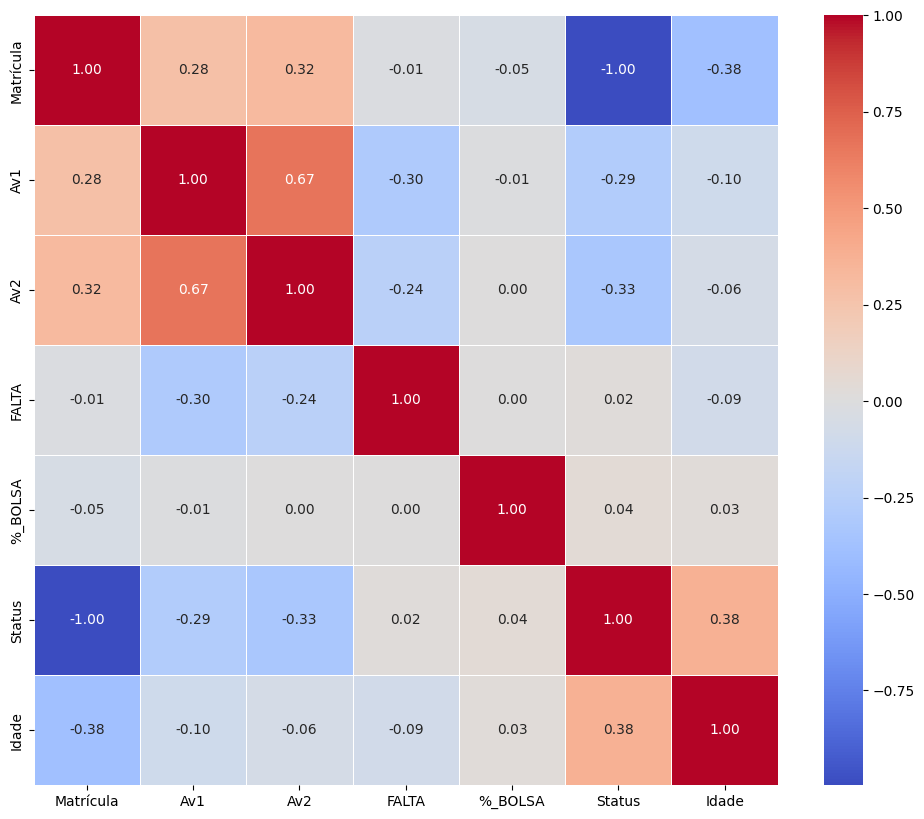

In [16]:
correlacao = df_limpo.corr()

# Criando um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [17]:
df_limpo

,Matrícula,Semestre,Curso,Disciplinas,Av1,Av2,FALTA,Tipo de Ingresso,BOLSA,%_BOLSA,Status,Idade
4,12.0,1/2021,Jornalismo,DATA SCIENCE PARA NEGÓCIOS I: APRENDENDO A PRO...,10.00,8.00,0.0,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0,1,21.0
5,12.0,1/2021,Jornalismo,HISTÓRIA E FORMAÇÃO SOCIAL BRASILEIRA,10.00,10.00,0.0,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0,1,21.0
6,12.0,1/2021,Jornalismo,INTRODUÇÃO À FOTOGRAFIA,7.20,6.50,0.0,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0,1,21.0
7,12.0,1/2021,Jornalismo,"LINGUAGEM, NARRATIVA E ESCRITA CRIATIVA",10.00,8.50,0.0,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0,1,21.0
8,12.0,1/2021,Jornalismo,PROFISSÃO JORNALISTA,9.00,9.00,0.0,VESTIBULAR/PROCESSO SELETIVO,Bolsa Vestibular,40.0,1,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2867,2311276.0,1/2023,Administração,BUSINESS I: FUNDAMENTOS DE NOVOS NEGÓCIOS,10.00,10.00,8.0,ENEM,Desconto Comercial,50.0,0,19.0
2868,2311276.0,1/2023,Administração,DATA SCIENCE PARA NEGÓCIOS I: APRENDENDO A PRO...,10.00,9.70,2.0,ENEM,Desconto Comercial,50.0,0,19.0
2869,2311276.0,1/2023,Administração,FÁBRICA DE STARTUPS I: NEW VENTURES,9.04,9.00,0.0,ENEM,Desconto Comercial,50.0,0,19.0
2870,2311276.0,1/2023,Administração,FUNDAMENTOS DA ECONOMIA,10.00,7.80,0.0,ENEM,Desconto Comercial,50.0,0,19.0


# CATEGORIZAÇÃO


In [18]:
df = pd.get_dummies(df, columns=['Matrícula', 'Semestre', 'Curso', 'Disciplinas', 'Tipo de Ingresso'], drop_first=True)

In [19]:
df = pd.get_dummies(df)

In [20]:
df.head()

,Av1,Av2,FALTA,%_BOLSA,Status,Idade,Matrícula_34.0,Matrícula_67.0,Matrícula_99.0,Matrícula_160.0,...,BOLSA_Bolsa Transferência,BOLSA_Bolsa Vestibular,BOLSA_Bolsa Veterano,BOLSA_Desconto 2ª Graduação,BOLSA_Desconto Calouro,BOLSA_Desconto Comercial,BOLSA_Desconto Convênio,BOLSA_Desconto Diretoria,BOLSA_FIES,BOLSA_PROUNI
4,10.0,8.0,0.0,40.0,1,21.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,10.0,10.0,0.0,40.0,1,21.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,7.2,6.5,0.0,40.0,1,21.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,10.0,8.5,0.0,40.0,1,21.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,9.0,9.0,0.0,40.0,1,21.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [21]:
# Separando os recursos (X) e o rótulo (y)
X = df.drop('Status', axis=1)  # Features
y = df['Status']  # Rótulo

# TREINAMENTO

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)


In [31]:
# Criando o modelo de árvore de decisão
modelo = DecisionTreeClassifier(max_depth=4, random_state=25)


In [32]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=25)

In [33]:
y_pred = modelo.predict(X_test)

In [34]:
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia:.2f}')

Acurácia do modelo: 0.83


In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)


Matriz de Confusão:
[[250   6]
 [ 65 105]]


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       256
           1       0.95      0.62      0.75       170

    accuracy                           0.83       426
   macro avg       0.87      0.80      0.81       426
weighted avg       0.85      0.83      0.82       426



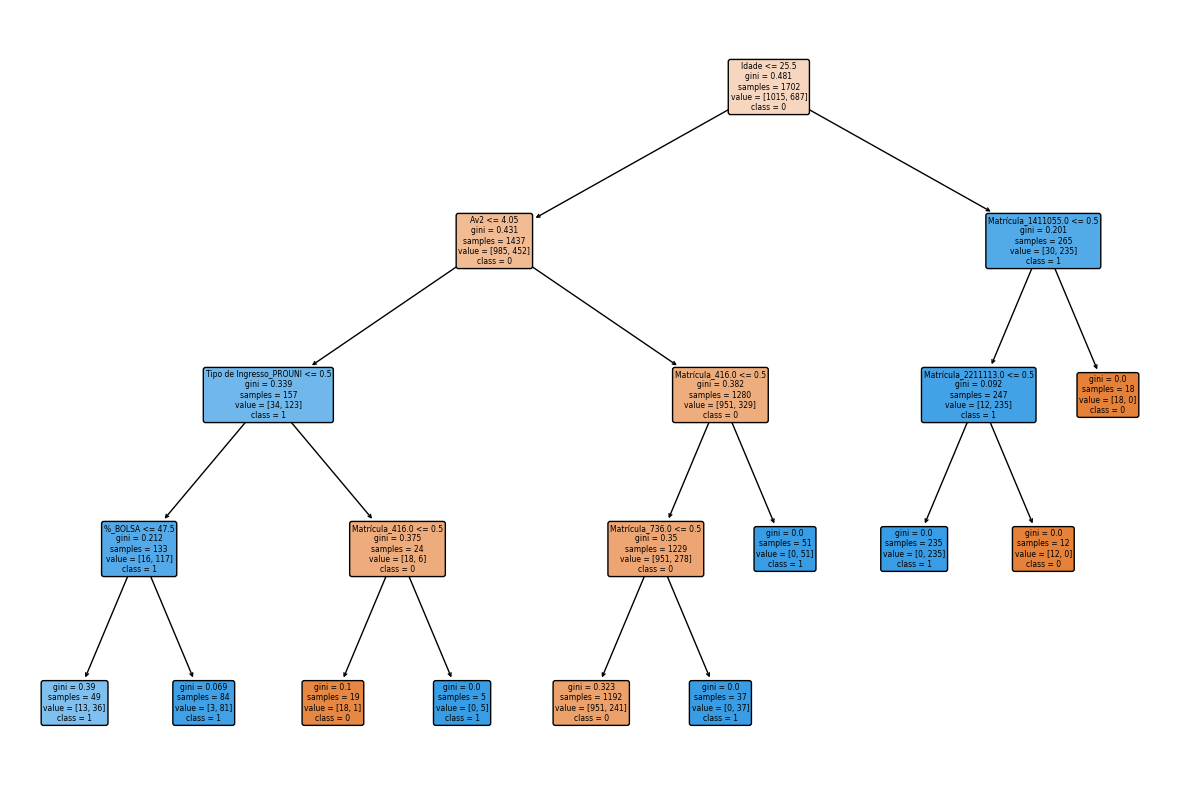

In [37]:
from sklearn.tree import plot_tree

# ... (código anterior)

# Exibindo a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.show()